In [1]:
%matplotlib inline

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC

# Non-linear SVM

Re-writing [this solved example](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py).

In [23]:
# Input matrix. Two vars, 300 entries.
X = np.random.randn(300, 2)

# Y=0 if the signs of x1 and x2 are the same; otherwise Y=1.
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Create and fit a SVC
model = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
)
model.fit(X, Y)

In [49]:
# Generate mesh values for the two input vars.
x0, x1 = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

In [32]:
# stack allong the second axis
coords = np.c_[x0.ravel(),x1.ravel()]
print('Corrds shape: ',coords.shape)

# Evaluate the decision function for the samples in X.
predictions = (model
               .decision_function(coords)
               .reshape(x0.shape)
              )
print('predictions shape: ',predictions.shape)

Corrds shape:  (250000, 2)
predictions shape:  (500, 500)


In [59]:
predictions

array([[0.11582674, 0.11373336, 0.11159701, ..., 0.29128742, 0.29026199,
        0.28924412],
       [0.11429503, 0.11217083, 0.11000325, ..., 0.29336315, 0.29230815,
        0.29126109],
       [0.11273412, 0.11057864, 0.10837935, ..., 0.29547489, 0.29438969,
        0.29331284],
       ...,
       [0.78784225, 0.79312936, 0.79840829, ..., 0.06241742, 0.06572685,
        0.06897296],
       [0.78849002, 0.79377108, 0.79904328, ..., 0.06371494, 0.06699463,
        0.07021154],
       [0.78909972, 0.79437451, 0.79963976, ..., 0.06500759, 0.06825766,
        0.0714455 ]])

Plotting the predictions as image 500x500 pixels.
That is why we need to `extent`:

> The extent keyword arguments controls the bounding box in data coordinates that the image will fill specified as (left, right, bottom, top) in data coordinates,

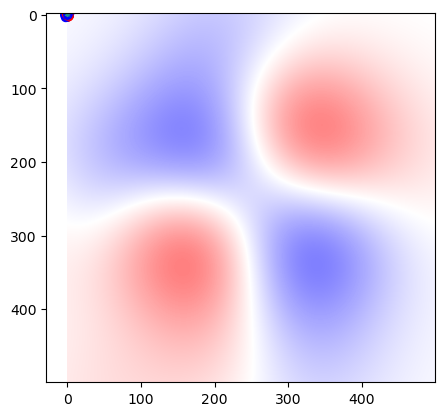

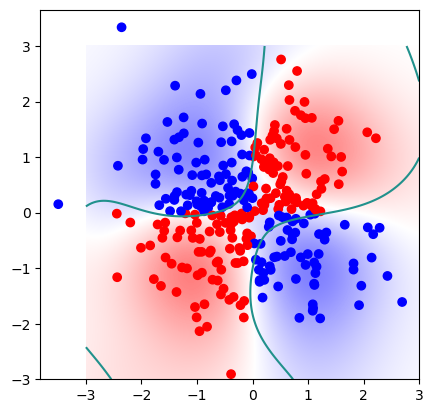

In [63]:
# Extent commented out
plt.imshow(
    predictions,
    # extent=(x0.min(), x0.max(), x1.min(), x1.max()),
    cmap='bwr',
    alpha=0.5
)

plt.contour(x0, x1, predictions, levels=1)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='bwr_r')
plt.show()


# With extent
plt.imshow(
    predictions,
    extent=(x0.min(), x0.max(), x1.min(), x1.max()),
    cmap='bwr',
    alpha=0.5
)

plt.contour(x0, x1, predictions, levels=1)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='bwr_r')
plt.show()

## Imshow `orgin` and `extent` params

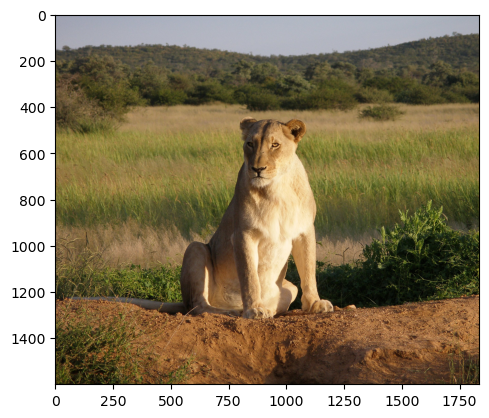

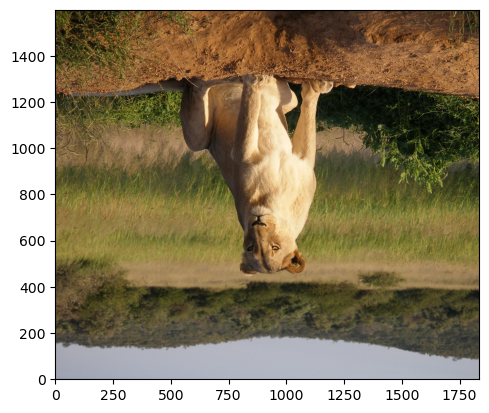

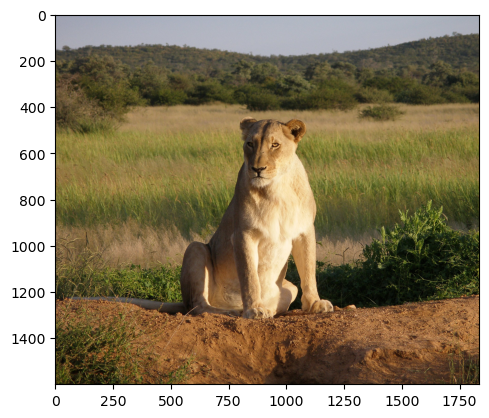

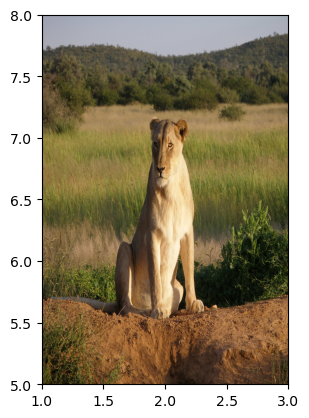

In [83]:
image = plt.imread('images/Okonjima_Lioness.jpg')

plt.imshow(image)
plt.show()

plt.imshow(image, origin='lower')
plt.show()

plt.imshow(image, origin='upper')
plt.show()

plt.imshow(image, extent=(1, 3, 5, 8))
plt.show()

## Contour demo

In [84]:
x = np.linspace(0, 10, 40)
y = np.linspace(3, 8, 20)

xx, yy = np.meshgrid(x, y)

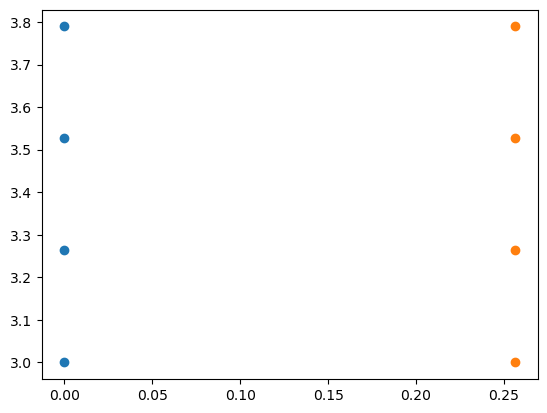

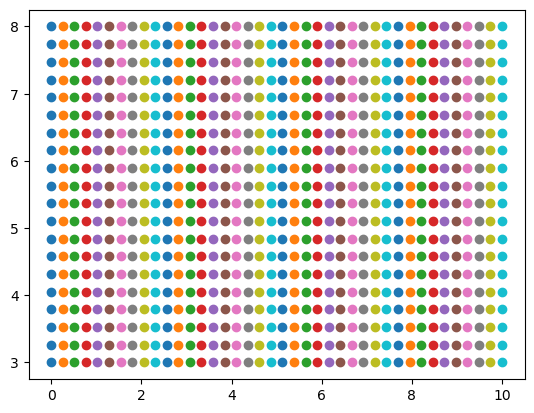

In [94]:
plt.plot(xx[:4,:2], yy[:4,:2], 'o')
plt.show()

plt.plot(xx, yy, 'o')
plt.show()

C:\Users\a1056968\AppData\Local\Temp\ipykernel_6084\3096128538.py:1: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, np.ones_like(xx))


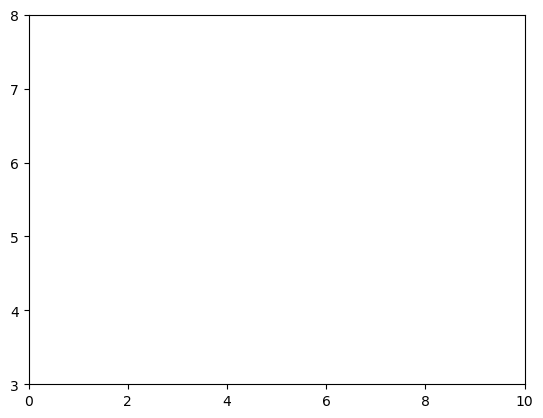

In [97]:
plt.contour(xx, yy, np.ones_like(xx))
plt.show()

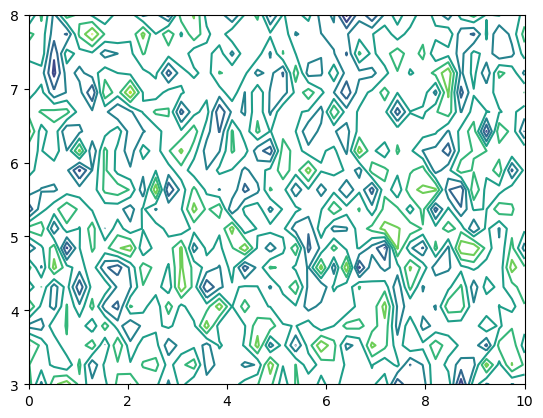

In [98]:
plt.contour(xx, yy, np.random.randn(*xx.shape))
plt.show()

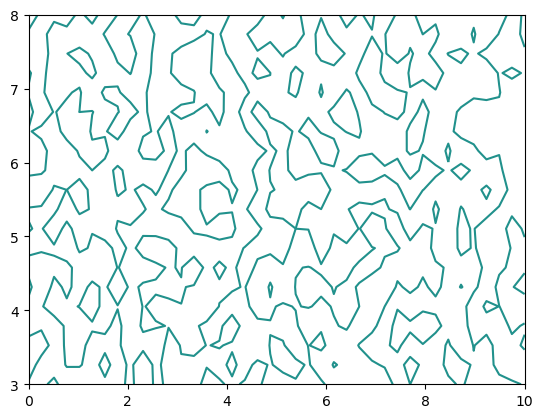

In [99]:
plt.contour(xx, yy, np.random.randn(*xx.shape), levels=1)
plt.show()